In [23]:
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
%matplotlib inline

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [34]:
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [25]:
from torch import nn
import torch.nn.functional as F
from torch import optim

In [26]:
model=nn.Sequential(nn.Linear(784,512),
                   nn.ReLU(),
                   nn.Linear(512,256),
                   nn.ReLU(),
                   nn.Linear(256,64),
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)
epochs=20

In [29]:
image, label = next(iter(trainloader))
image.shape

torch.Size([64, 1, 28, 28])

In [30]:
# TODO: Train the network here
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

/home/shashank/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss: 0.5166832933118984
Training loss: 0.39590745049117726
Training loss: 0.3537177063349976
Training loss: 0.3273714430916157
Training loss: 0.31095978223295734
Training loss: 0.2969197209026895
Training loss: 0.28855815885671926
Training loss: 0.2749406290746955
Training loss: 0.2708765852775401
Training loss: 0.2589644092454839
Training loss: 0.24941038847890998
Training loss: 0.24412645033793026
Training loss: 0.23778972420484018
Training loss: 0.2351009098133807
Training loss: 0.22607521667504615
Training loss: 0.22254877826615946
Training loss: 0.22488145420212607
Training loss: 0.21282861647861345
Training loss: 0.21428710585638786
Training loss: 0.20843755326736202


/home/shashank/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


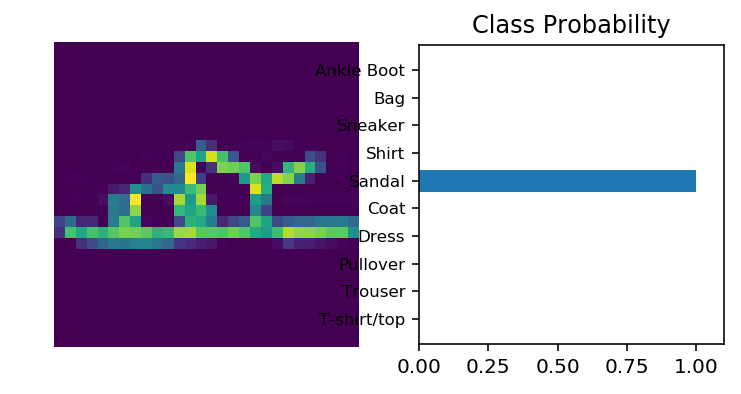

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps=torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')